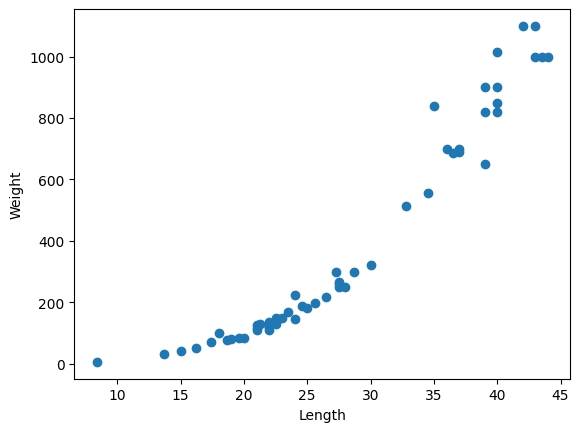

In [34]:
import numpy as np
import matplotlib.pyplot as plt


perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor

for i in range(3,10,2):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_input, train_target)
    print(f'Number of neighbors: {i}')
    print(f'Train score: {knr.score(train_input, train_target)}')
    print(f'Test score: {knr.score(test_input, test_target)}\n')
    
from sklearn.metrics import mean_absolute_error
knr.n_neighbors=3
predict=knr.predict(test_input)
mae=mean_absolute_error(test_target,predict)
print(f'Mean Absolute Error: {mae}')

Number of neighbors: 3
Train score: 0.9804899950518966
Test score: 0.9746459963987609

Number of neighbors: 5
Train score: 0.9698823289099254
Test score: 0.992809406101064

Number of neighbors: 7
Train score: 0.9761170732051527
Test score: 0.9781383949643516

Number of neighbors: 9
Train score: 0.9693310367551284
Test score: 0.9692647749722698

Mean Absolute Error: 35.42380952380951


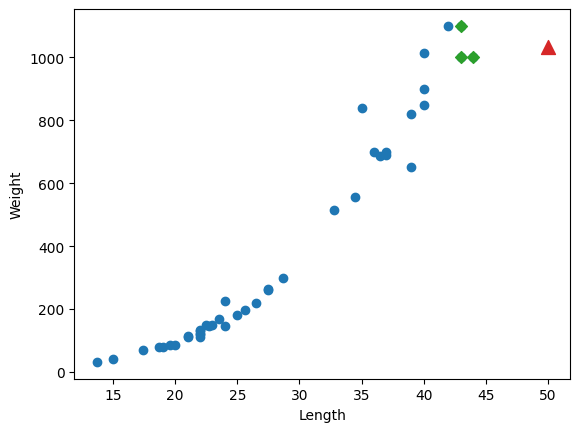

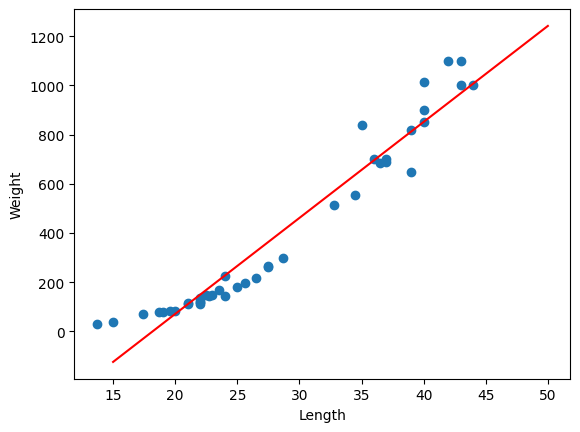

In [36]:
import numpy as np
import matplotlib.pyplot as plt


perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker='^')
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, knr.predict([[50]]), marker='^', s=100)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
plt.scatter(train_input, train_target)
plt.plot(
    [15, 50],
    [15 * lr.coef_[0] + lr.intercept_, 50 * lr.coef_[0] + lr.intercept_],
    color='red'
)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

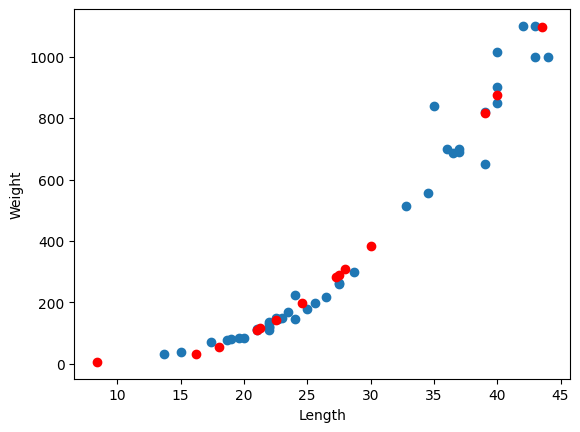

Coefficients: [[  1.01433211 -21.55792498]], Intercept: [116.05021078]


In [37]:
poly_input = np.column_stack((train_input**2, train_input))
poly_test_input = np.column_stack((test_input**2, test_input))
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(poly_input, train_target)
plt.scatter(train_input, train_target)

plt.scatter(test_input, lr.predict(poly_test_input), color='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()
a=lr.coef_
b=lr.intercept_
print(f'Coefficients: {a}, Intercept: {b}')

인접알고리즘:0.9746459963987609
linear모델0.8247503123313558
이차함수예측0.9775935108325122


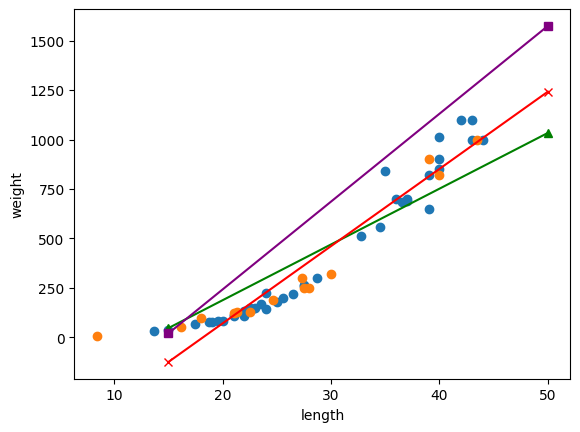

In [48]:
#정리

import numpy as np
import matplotlib.pyplot as plt


perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
train_input,test_input,train_target,test_target= train_test_split(perch_length,perch_weight,random_state=42)
train_input =train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

knr= KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)
print(f"인접알고리즘:{knr.score(test_input,test_target)}")
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input,train_target)
print(f"linear모델{lr.score(test_input,test_target)}")
poly_input_train=np.column_stack((train_input**2,train_input))
poly_input_test=np.column_stack((test_input **2,test_input))
lr_poly=LinearRegression()
lr_poly.fit(poly_input_train,train_target)
print(f"이차함수예측{lr_poly.score(poly_input_test,test_target)}")
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)


check_point=np.array([[15],[50]])
poly_check=np.column_stack((check_point**2,check_point))
plt.plot([15,50],knr.predict(check_point),marker='^', c='green', label='linear @15,50')
plt.plot([15,50],lr.predict(check_point) ,marker='x', c='red',   label='knn @15,50')
plt.plot([15,50],lr_poly.predict(poly_check), marker='s', c='purple', label='poly @15,50')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
